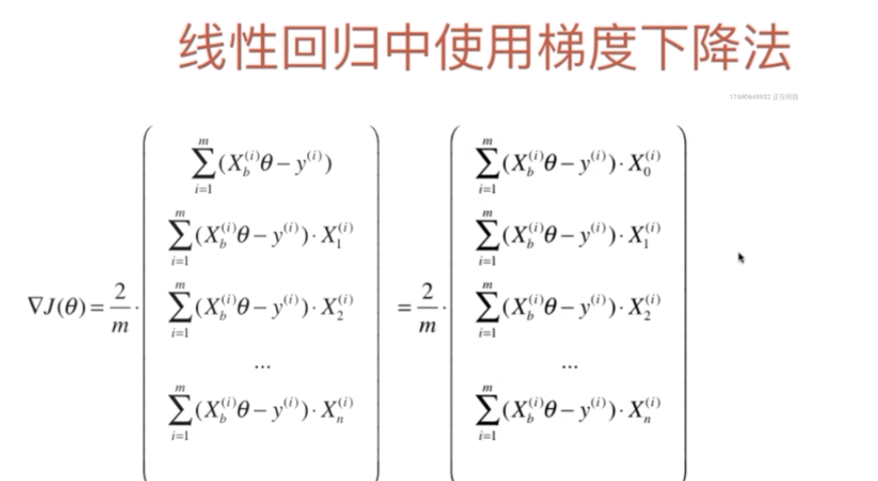

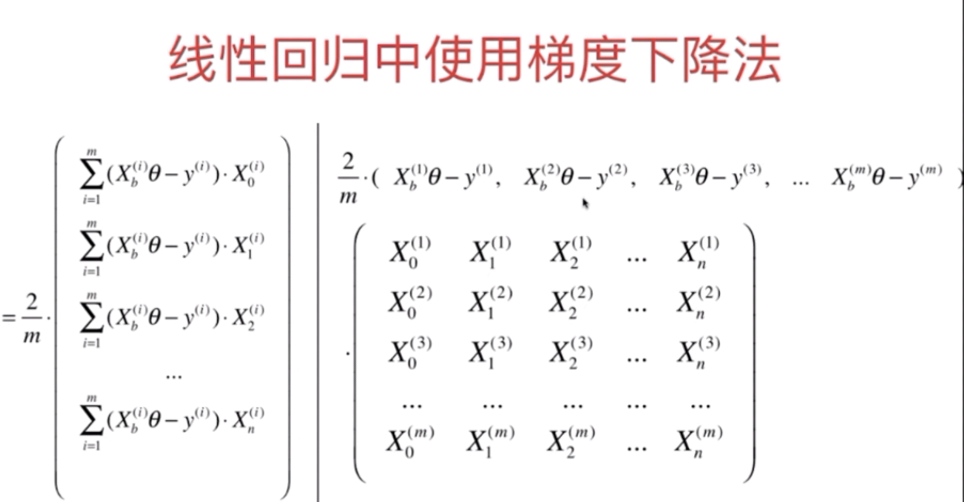

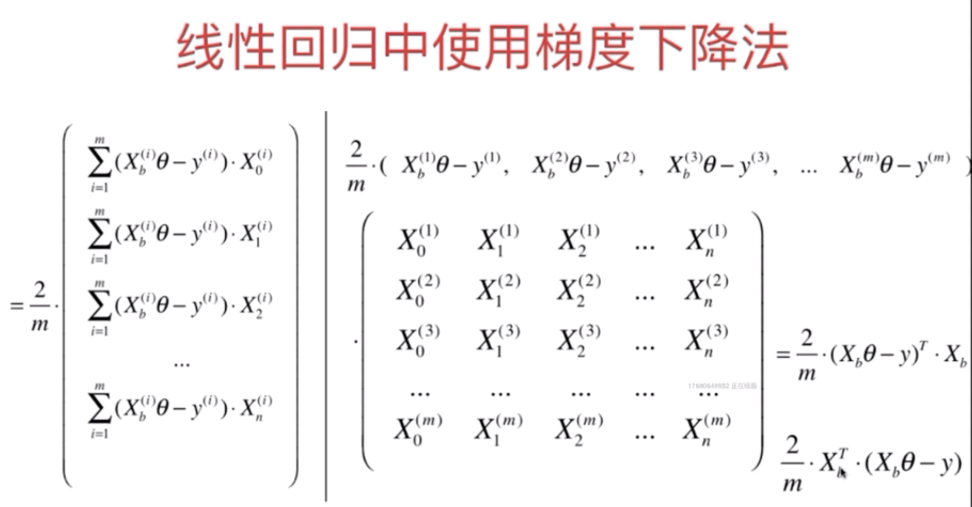

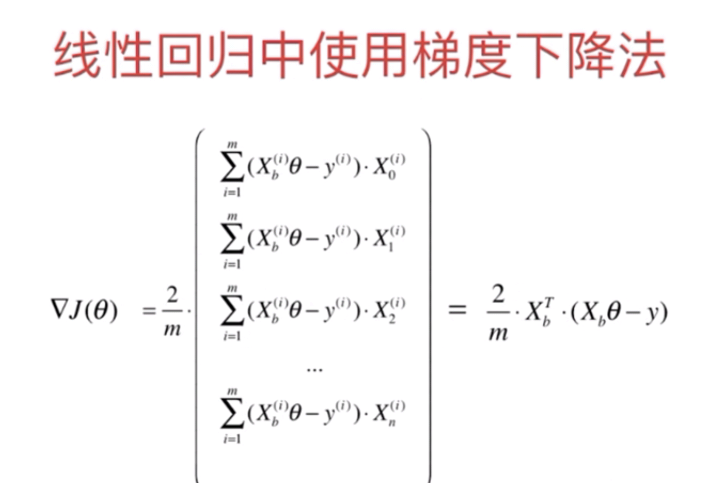

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)



In [9]:
%run LinearRegression.py

lin_reg = LinearRegression()
%time lin_reg.fit_normal(X_train, y_train)
lin_reg.score(X_test, y_test)

CPU times: user 578 µs, sys: 605 µs, total: 1.18 ms
Wall time: 665 µs


0.800891619951904

### 使用梯度下降算法

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

/Users/liaoyifeng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/liaoyifeng/ml/6_梯度下降法/LinearRegression.py:32: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
/Users/liaoyifeng/ml/6_梯度下降法/LinearRegression.py:53: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
/Users/liaoyifeng/ml/6_梯度下降法/LinearRegression.py:42: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)


LinearRegression()

In [13]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [16]:
X_train[:10,:]

array([[9.2520e-02, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01,
        6.6060e+00, 4.2200e+01, 6.1899e+00, 6.0000e+00, 3.0000e+02,
        1.6600e+01, 3.8378e+02, 7.3700e+00],
       [8.6640e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01,
        7.1780e+00, 2.6300e+01, 6.4798e+00, 5.0000e+00, 3.9800e+02,
        1.5200e+01, 3.9049e+02, 2.8700e+00],
       [2.8750e-02, 2.8000e+01, 1.5040e+01, 0.0000e+00, 4.6400e-01,
        6.2110e+00, 2.8900e+01, 3.6659e+00, 4.0000e+00, 2.7000e+02,
        1.8200e+01, 3.9633e+02, 6.2100e+00],
       [7.1650e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01,
        6.0040e+00, 8.4100e+01, 2.1974e+00, 2.0000e+00, 1.8800e+02,
        1.9100e+01, 3.7767e+02, 1.4270e+01],
       [4.0110e-02, 8.0000e+01, 1.5200e+00, 0.0000e+00, 4.0400e-01,
        7.2870e+00, 3.4100e+01, 7.3090e+00, 2.0000e+00, 3.2900e+02,
        1.2600e+01, 3.9690e+02, 4.0800e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e

In [17]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression()

In [18]:
lin_reg2.score(X_test, y_test)

0.30334322896870736

In [19]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

CPU times: user 39.9 s, sys: 137 ms, total: 40 s
Wall time: 40.3 s


LinearRegression()

In [20]:
lin_reg2.score(X_test, y_test)

0.7378316683719017

### 初始造成数据过大结果不收敛（过大nan），数据运算时间过久，需要数据归一化
### 使用梯度下降前需要进行数据归一化

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
X_train_standard = standardScaler.transform(X_train)

In [26]:
lin_reg3 = LinearRegression()

In [27]:
%time lin_reg3.fit_gd(X_train_standard, y_train)

CPU times: user 200 ms, sys: 4.89 ms, total: 205 ms
Wall time: 207 ms


LinearRegression()

In [28]:
X_test_standard = standardScaler.transform(X_test)

In [29]:
lin_reg3.score(X_test_standard, y_test)

0.8008795460586364

### 梯度下降法的优势

In [32]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)

big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10., size=m)

In [36]:
big_X[:10,]

array([[-1.51545894, -0.13039876, -1.08028833, ...,  1.16261586,
         1.40097379,  0.40983328],
       [ 0.00914316, -0.50508115, -1.18278515, ...,  0.27419756,
         0.91668248,  0.02899624],
       [-0.1897349 , -0.00580068,  0.41742902, ...,  1.99222379,
        -0.77911218,  1.1539698 ],
       ...,
       [-0.76434286,  1.59612207, -2.07485386, ..., -1.08602812,
         1.32255795, -1.2685559 ],
       [-0.59151328, -0.77712727, -0.07204011, ..., -1.05575572,
        -1.13218364, -0.15208958],
       [-1.3017593 , -0.92035865,  1.86615039, ...,  0.40293651,
        -0.96347962, -0.65338842]])

In [35]:
big_y[:10,]

array([ 1282.72242257,  1960.32243428,  1759.45872175,  2620.39736447,
       -3641.12343161,   112.69833191,   -88.24142642,  5031.8463224 ,
       -4762.71649417,  -896.98657259])

In [37]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

CPU times: user 21.2 s, sys: 1.67 s, total: 22.8 s
Wall time: 12.4 s


LinearRegression()

In [38]:
big_reg2 = LinearRegression()
%time big_reg1.fit_gd(big_X, big_y)

CPU times: user 8.93 s, sys: 165 ms, total: 9.09 s
Wall time: 4.91 s


LinearRegression()